# Image Filtering

In this notebook, the goal is to understand how image filtering works in practive and how using OpenCV for filtering can make your life easier.

# Border Handling

Load an image with OpenCV & add a border, using the "mirror" strategy for the border pixels. Don't use OpenCV's *copyMakeBorder* function - implement the border yourself.

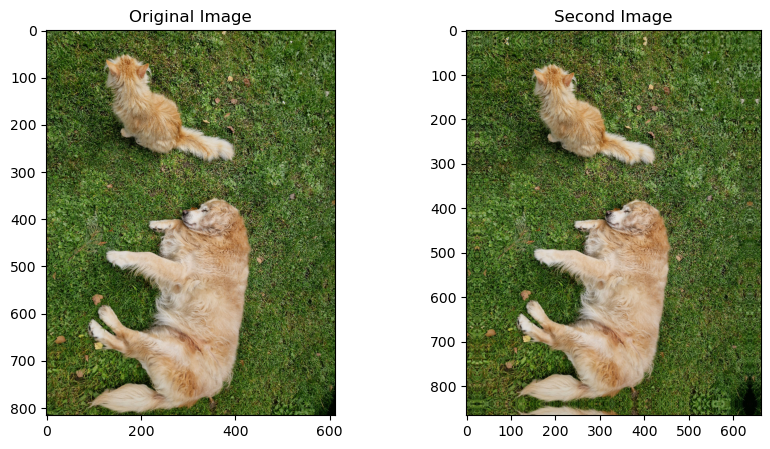

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def mirror(image, borderSize, sizeFactor):
    height, width, channels = image.shape  # Number of rows and columns in the image
    
    newHeight = height + sizeFactor
    newWidth = width + sizeFactor
    image2 = np.zeros((newHeight, newWidth ,channels), dtype=np.uint8)

    image2[borderSize: borderSize + height, borderSize: borderSize + width] = image

    #top
    image2[0:borderSize, borderSize: borderSize + width] = np.flipud(image[0:borderSize, :])  # flipupdown
    #bottom
    image2[borderSize + height:newHeight, borderSize: borderSize + width] = np.flipud(image[height - borderSize:height, :])  # flipupdown

    #left
    image2[:, 0:borderSize] = np.fliplr(image2[:,borderSize:2*borderSize])  # flipleftright
    #right
    image2[:, borderSize + width:newWidth] = np.fliplr(image2[:,width:width + borderSize])  # flipleftright
    return image2

jacky = cv2.imread('ressources/jacky.jpg')
jacky = cv2.cvtColor(jacky, cv2.COLOR_BGR2RGB)

borderSize = 50

height, width, channels = jacky.shape
jacky = cv2.resize(jacky,(int(width / 10), int(height / 10)))
image = mirror(jacky, 25, 50)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(jacky)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Second Image')
plt.show()


## Applying a Convolution Kernel

Define the kernel matrix for a 25x25 box blur, and manually (i.e. without using OpenCV) apply this filter to an image of your choice. Use the code from the previous task to add a border before applying the filter.

Text(0.5, 1.0, 'Second Image')

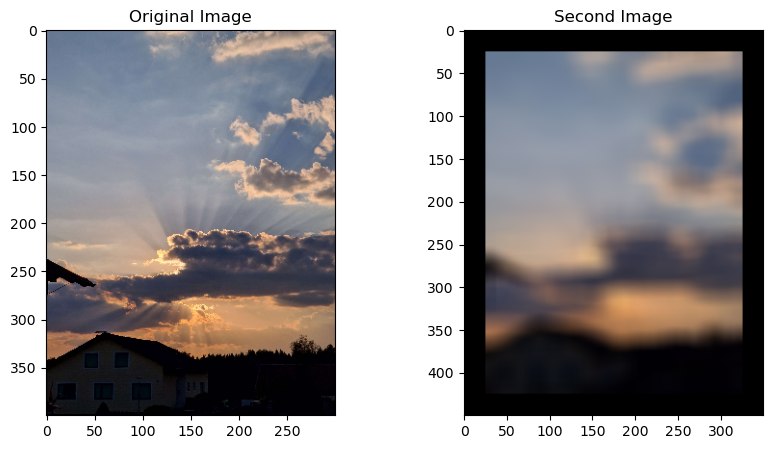

In [4]:
# YOUR CODE HERE
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

wolke = cv2.imread('ressources/wolke.jpg')
wolke = cv2.cvtColor(wolke, cv2.COLOR_BGR2RGB)
height, width, channels = wolke.shape  # Number of rows and columns in the image
image = cv2.resize(wolke,(int(width / 10), int(height / 10)))
height, width, channels = image.shape  # Number of rows and columns in the image

borderSize = 25
border_image = mirror(image, borderSize,50)


kernelSize = 25
box_blur_kernel = np.ones((kernelSize, kernelSize), dtype=np.float64) / (kernelSize * kernelSize)

# Apply the box blur filter manually
filtered_image = np.zeros_like(border_image, dtype=np.uint8)
for c in range(3):
    for i in range(borderSize, border_image.shape[0] - borderSize):
        for j in range(borderSize, border_image.shape[1] - borderSize):
            sum_value = 0
            for m in range(kernelSize):
                for n in range(kernelSize):
                    sum_value += border_image[i - kernelSize // 2 + m, j - kernelSize // 2 + n, c] * box_blur_kernel[m, n]
            filtered_image[i, j, c] = sum_value


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Second Image')

## Applying a x/y-Separated Convolution Kernel

Now achieve the 25x25 box blur using a 1D kernel. Again, apply the kernel manually, without using OpenCV.

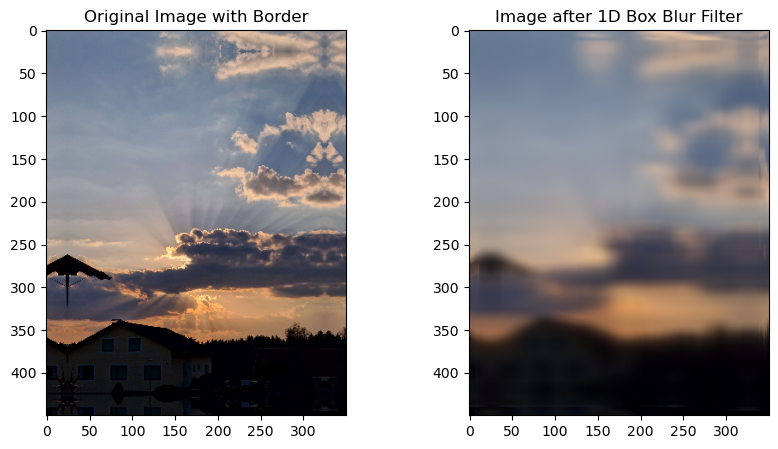

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Apply the 1D box blur filter manually
def box_blur_1d(image, kernel_size):
    kernel = np.ones(kernel_size, dtype=np.float64) / kernel_size  # Use np.float64 for the data type
    filtered_image = np.copy(image)

    # Apply the 1D box blur horizontally
    for c in range(3):
        for i in range(image.shape[0]):
            for j in range(kernel_size // 2, image.shape[1] - kernel_size // 2):
                sum_value = 0
                for m in range(kernel_size):
                    sum_value += image[i, j - kernel_size // 2 + m, c] * kernel[m]
                filtered_image[i, j, c] = sum_value

    # Apply the 1D box blur vertically
    for c in range(3):
        for j in range(image.shape[1]):
            for i in range(kernel_size // 2, image.shape[0] - kernel_size // 2):
                sum_value = 0
                for m in range(kernel_size):
                    sum_value += filtered_image[i - kernel_size // 2 + m, j, c] * kernel[m]
                filtered_image[i, j, c] = sum_value

    return filtered_image

# Load the image
wolke = cv2.imread('ressources/wolke.jpg')
wolke = cv2.cvtColor(wolke, cv2.COLOR_BGR2RGB)
height, width, channels = wolke.shape  # Number of rows and columns in the image
image = cv2.resize(wolke,(int(width / 10), int(height / 10)))
height, width, channels = image.shape  # Number of rows and columns in the image

borderSize = 25
border_image = mirror(image, borderSize,50)

# Apply the 1D box blur filter
filtered_image = box_blur_1d(border_image, 25)

# Plot the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(border_image)
plt.title('Original Image with Border')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Image after 1D Box Blur Filter')
plt.show()


## Gaussian Kernel A

Write a function that calulates the coefficients of a 2D Gaussian Filter with a given size and sigma. Use your function to calculate the coefficients for a 13x13 Gaussian filter with $\sigma = 2$, then use OpenCV's *filter2D* function to apply this kernel to an image.

Gaussian Filter Coefficients:
[[4.92039285e-06 1.94605312e-05 5.99426562e-05 1.43794957e-04
  2.68644347e-04 3.90875219e-04 4.42919649e-04 3.90875219e-04
  2.68644347e-04 1.43794957e-04 5.99426562e-05 1.94605312e-05
  4.92039285e-06]
 [1.94605312e-05 7.69678941e-05 2.37077804e-04 5.68720087e-04
  1.06250900e-03 1.54594148e-03 1.75178119e-03 1.54594148e-03
  1.06250900e-03 5.68720087e-04 2.37077804e-04 7.69678941e-05
  1.94605312e-05]
 [5.99426562e-05 2.37077804e-04 7.30251047e-04 1.75178119e-03
  3.27275814e-03 4.76183499e-03 5.39586595e-03 4.76183499e-03
  3.27275814e-03 1.75178119e-03 7.30251047e-04 2.37077804e-04
  5.99426562e-05]
 [1.43794957e-04 5.68720087e-04 1.75178119e-03 4.20230463e-03
  7.85093863e-03 1.14230483e-02 1.29440095e-02 1.14230483e-02
  7.85093863e-03 4.20230463e-03 1.75178119e-03 5.68720087e-04
  1.43794957e-04]
 [2.68644347e-04 1.06250900e-03 3.27275814e-03 7.85093863e-03
  1.46674844e-02 2.13410638e-02 2.41825935e-02 2.13410638e-02
  1.46674844e-02 7.85093863e-0

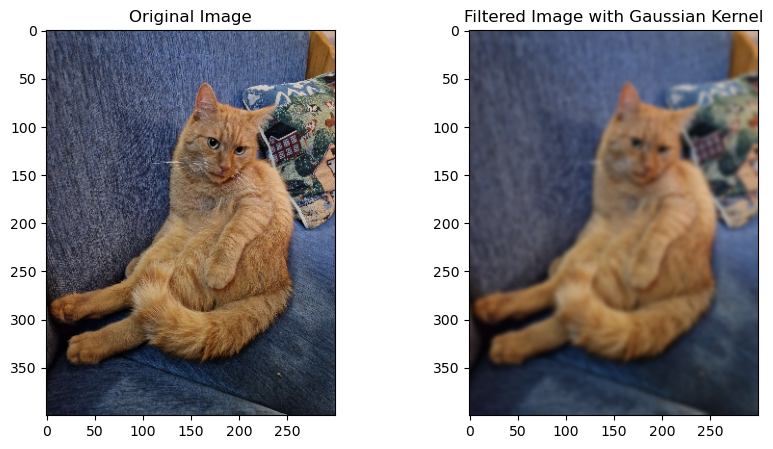

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

# Calculate the coefficients for a 13x13 Gaussian filter with sigma = 2
size = 13
sigma = 2
gaussian_filter = gaussian_kernel(size, sigma)
print("Gaussian Filter Coefficients:")
print(gaussian_filter)


leo = cv2.imread('ressources/leo.jpg')
height, width, channels = leo.shape  # Number of rows and columns in the image
image = cv2.resize(leo,(int(width / 10), int(height / 10)))
height, width, channels = image.shape  # Number of rows and columns in the image

borderSize = 25
border_image = mirror(image, borderSize,50)

filtered_image = cv2.filter2D(image, -1, gaussian_filter)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image with Gaussian Kernel')
plt.show()

## x/y-Separated Gaussian Kernel

Now write a function that calculates the coefficients of an 1D Gaussian Filter with a given size and sigma, and use this in combination with OpenCV's *sepFilter2D* function to achieve a 13x13 Gaussian blur with $\sigma = 2$. Compare the blurred image with the result of the previous task. Make sure you use the same border handling strategy in both tasks.

1D Gaussian Filter Coefficients:
[0.0022182  0.00877313 0.02702316 0.06482519 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482519 0.02702316 0.00877313
 0.0022182 ]


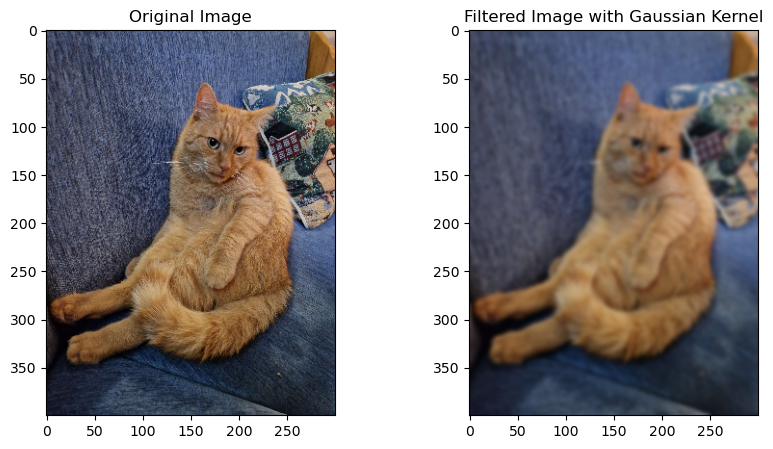

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def gaussian_kernel_1d(size, sigma):
    kernel_1d = np.fromfunction(lambda x: (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(x-(size-1)/2)**2 / (2*sigma**2)), (size,))
    return kernel_1d / np.sum(kernel_1d)

# Calculate the coefficients for a 13x13 Gaussian filter with sigma = 2
size_1d = 13
sigma_1d = 2
gaussian_filter_1d = gaussian_kernel_1d(size_1d, sigma_1d)
print("1D Gaussian Filter Coefficients:")
print(gaussian_filter_1d)

leo = cv2.imread('ressources/leo.jpg')
height, width, channels = leo.shape  # Number of rows and columns in the image
image = cv2.resize(leo,(int(width / 10), int(height / 10)))
height, width, channels = image.shape  # Number of rows and columns in the image

borderSize = 25
border_image = mirror(image, borderSize,50)


filtered_image_1d = cv2.sepFilter2D(image, -1, gaussian_filter_1d, gaussian_filter_1d, borderType=cv2.BORDER_REPLICATE)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image_1d, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image with Gaussian Kernel')
plt.show()

## OpenCV's Gaussian Blur

Finally, use OpenCV's *GaussianBlur* function to create 13x13 Gaussian blur with $\sigma = 2$ and compare the output with the results of the previous two tasks.

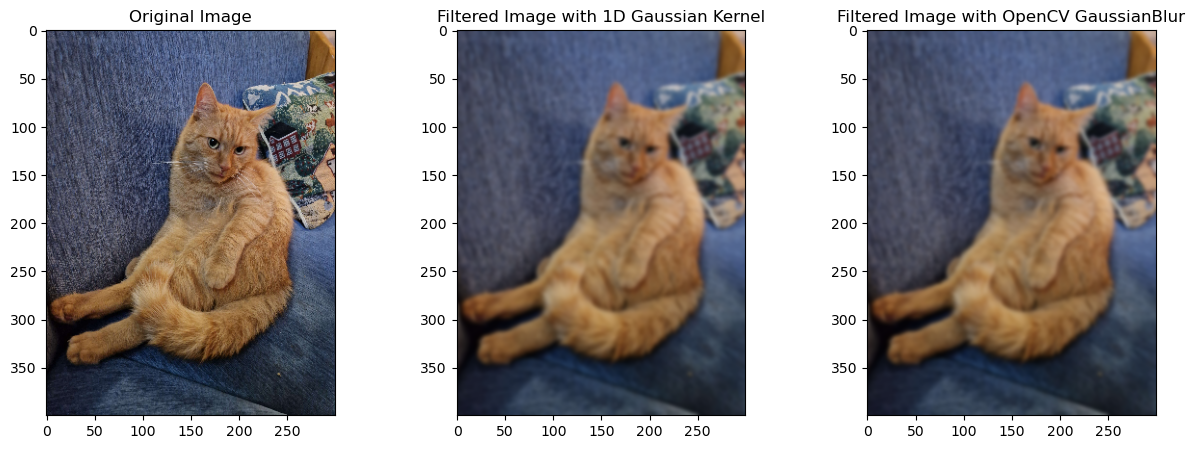

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load an image

leo = cv2.imread('ressources/leo.jpg')
height, width, channels = leo.shape  # Number of rows and columns in the image
image = cv2.resize(leo,(int(width / 10), int(height / 10)))
height, width, channels = image.shape  # Number of rows and columns in the image

borderSize = 25
border_image = mirror(image, borderSize,50)


# Apply the Gaussian blur using OpenCV's GaussianBlur function
blurred_image_opencv = cv2.GaussianBlur(image, (13, 13), 2, borderType=cv2.BORDER_REPLICATE)

# Display the original and filtered images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(filtered_image_1d, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image with 1D Gaussian Kernel')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blurred_image_opencv, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image with OpenCV GaussianBlur')
plt.show()

## Salt & Pepper Noise

Below is a function that adds salt-and-pepper noise to a grayscale image. The "pct_of_noise" parameter defines roughly how many pixels will be replaced with noise, in %. Test the function by adding 10% noise to an image.

In [29]:
import random

def add_noise(img, pct_of_noise):
    pct = max(min(pct_of_noise, 1.0), 0.0) #restrict percent to [0, 1]
    row, col = img.shape
    number_of_total_pixels = row * col
    number_of_noise_pixels = int(pct * number_of_total_pixels / 2)
    for i in range(number_of_noise_pixels): 
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        img[y_coord][x_coord] = 255         
    for i in range(number_of_noise_pixels): 
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        img[y_coord][x_coord] = 0          
    return img 

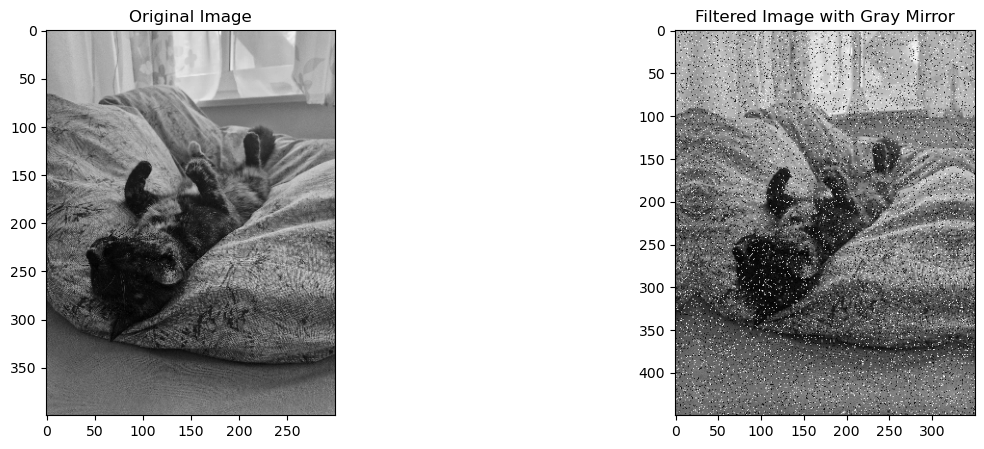

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def gray_mirror(image, borderSize, sizeFactor):
    height, width = image.shape  # Number of rows and columns in the image
    
    newHeight = height + sizeFactor
    newWidth = width + sizeFactor
    image2 = np.zeros((newHeight, newWidth), dtype=np.uint8)

    image2[borderSize: borderSize + height, borderSize: borderSize + width] = image

    # top
    image2[0:borderSize, borderSize: borderSize + width] = np.flipud(image[0:borderSize, :])  # flipupdown
    # bottom
    image2[borderSize + height:newHeight, borderSize: borderSize + width] = np.flipud(image[height - borderSize:height, :])  # flipupdown

    # left
    image2[:, 0:borderSize] = np.fliplr(image2[:, borderSize:2*borderSize])  # flipleftright
    # right
    image2[:, borderSize + width:newWidth] = np.fliplr(image2[:, width:width + borderSize])  # flipleftright
    
    return image2

# Load an image
lucy = cv2.imread('ressources/lucy.jpg', cv2.IMREAD_GRAYSCALE)
height, width = lucy.shape  # Number of rows and columns in the image
image = cv2.resize(lucy, (int(width / 10), int(height / 10)))
height, width = image.shape  # Number of rows and columns in the image

borderSize = 25
grayscale_image = gray_mirror(image, borderSize, 50)

# Add 10% noise to the image
noisy_image = add_noise(grayscale_image, 0.1)

# Display the original and filtered images
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Filtered Image with Gray Mirror')
plt.show()


## Noise Removal + Minimum/Maximum Filters

Use the noise function to add salt-and-pepper noise to a grayscale image. Then, try to remove the noise with the help of min and max filters - you can use OpenCV for this task. In OpenCV, applying minimum and maximum filters to an image can be achieved with the [morphological operations](https://docs.opencv.org/4.x/d4/d76/tutorial_js_morphological_ops.html) *erode* and *dilate*, respectively.

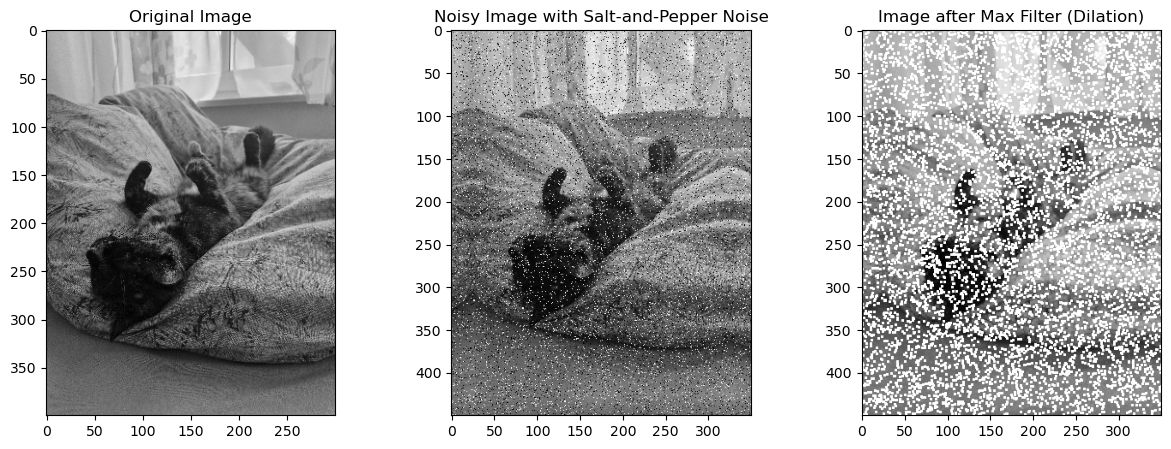

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load an image
lucy = cv2.imread('ressources/lucy.jpg', cv2.IMREAD_GRAYSCALE)
height, width = lucy.shape  # Number of rows and columns in the image
image = cv2.resize(lucy, (int(width / 10), int(height / 10)))
height, width = image.shape  # Number of rows and columns in the image

borderSize = 25
grayscale_image = gray_mirror(image, borderSize, 50)

# Add 10% noise to the image
noisy_image = add_noise(grayscale_image, 0.1)

kernel_size = 3  # Adjust the kernel size as needed
min_filtered_image = cv2.erode(noisy_image, np.ones((kernel_size, kernel_size), np.uint8), iterations=1)
max_filtered_image = cv2.dilate(noisy_image, np.ones((kernel_size, kernel_size), np.uint8), iterations=1)


# Display the original, noisy, and filtered images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Salt-and-Pepper Noise')

plt.subplot(1, 3, 3)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Image after Min Filter (Erosion)')

plt.subplot(1, 3, 3)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Image after Max Filter (Dilation)')

plt.show()

## Noise Removal + Median Filter

Again, use the noise function to add salt-and-pepper noise to a grayscale image. Then, try to remove the noise with the help of a median filter - you can use OpenCV for this task. Compare the results of the median & the minmax approach - what do you see?

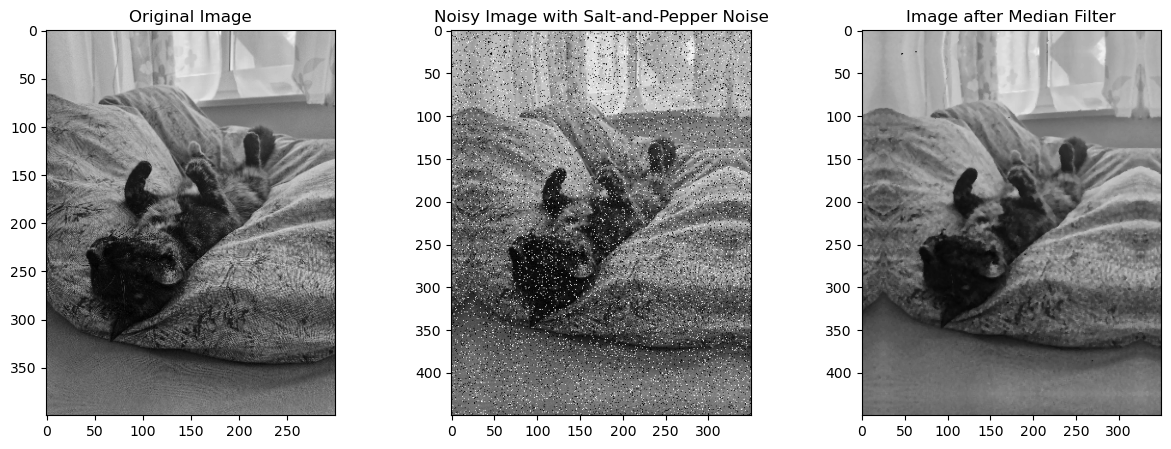

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load an image
lucy = cv2.imread('ressources/lucy.jpg', cv2.IMREAD_GRAYSCALE)
height, width = lucy.shape  # Number of rows and columns in the image
image = cv2.resize(lucy, (int(width / 10), int(height / 10)))
height, width = image.shape  # Number of rows and columns in the image

borderSize = 25
grayscale_image = gray_mirror(image, borderSize, 50)

# Add 10% noise to the image
noisy_image = add_noise(grayscale_image, 0.1)
median_filtered_image = cv2.medianBlur(noisy_image, 3)  # Adjust the kernel size as needed

# Display the original, noisy, and filtered images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image with Salt-and-Pepper Noise')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Image after Median Filter')

plt.show()